# Welcome to Covid19 Data Analysis Notebook Part 2

### This analysis studies the relationship between a given country's COVID-19 deaths and the country's state of development, assesed by their GDP per capita, healthy life expectancy, social support, and their freedom to make life choices. 

### Let's Import the modules 

In [96]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: Let's import the COVID-19 dataset



In [97]:
#Read the data and store it into an object. The path to the correct csv file is the argument for the .read_csv method
confirmed_deaths = pd.read_csv("Dataset for practice/covid19_deaths_dataset.csv")

#Print out the first 5 entries in the data set
confirmed_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### Let's check the shape of the dataframe

In [98]:
confirmed_deaths.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [66]:
confirmed_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)

In [67]:
confirmed_deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,Albania,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,Andorra,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### Task 2.3: Aggregating the rows by the country

In [68]:
confirmed_deaths_agg = confirmed_deaths.groupby("Country/Region").sum()

In [69]:
confirmed_deaths_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [70]:
confirmed_deaths_agg.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

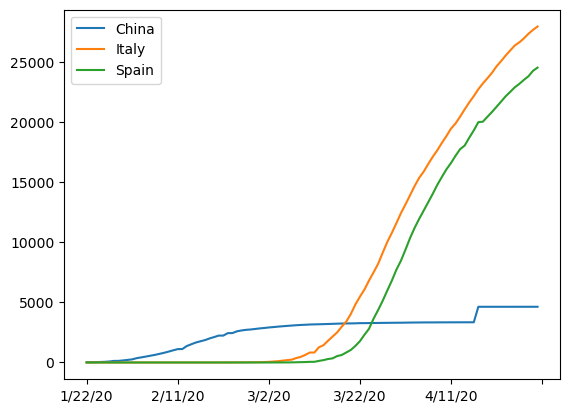

In [71]:
confirmed_deaths_agg.loc["China"].plot()
confirmed_deaths_agg.loc["Italy"].plot()
confirmed_deaths_agg.loc["Spain"].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot: >

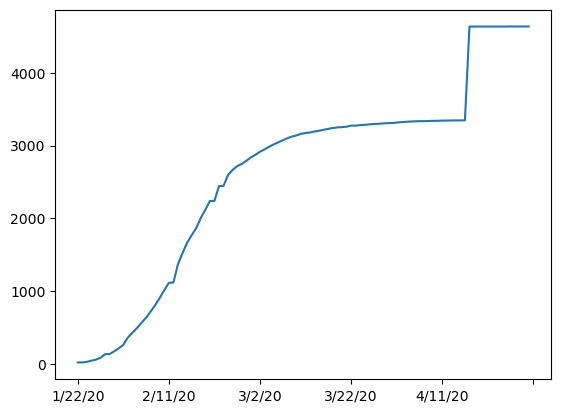

In [72]:
confirmed_deaths_agg.loc['China'].plot()

<AxesSubplot: >

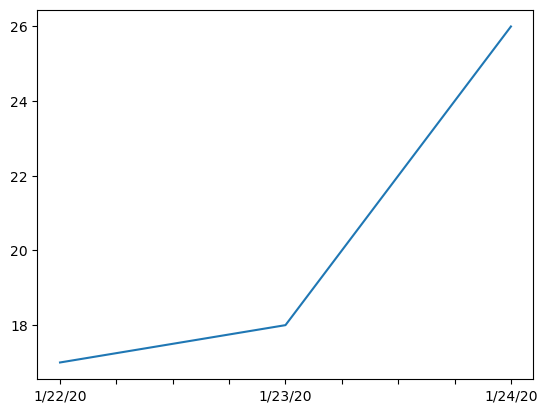

In [73]:
confirmed_deaths_agg.loc['China'][:3].plot()

### Task 3.1: Calculating the first derivative of the curve

<AxesSubplot: >

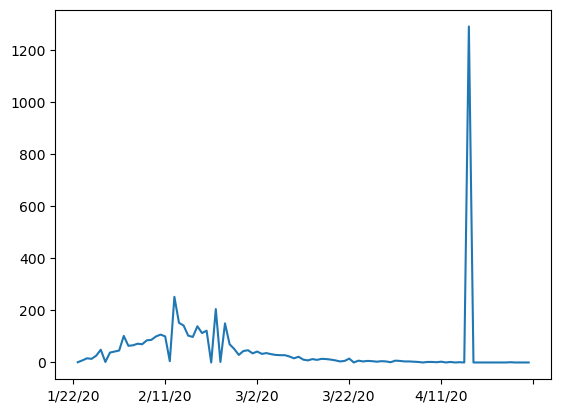

In [74]:
confirmed_deaths_agg.loc["China"].diff().plot()

### Task 3.2: find maxmimum death rate for China, Italy and Spain

In [75]:
confirmed_deaths_agg.loc["China"].diff().max()

1290.0

In [76]:
confirmed_deaths_agg.loc["Italy"].diff().max()

919.0

In [77]:
confirmed_deaths_agg.loc["Spain"].diff().max()

961.0

### Task 3.3: Find maximum death rate for all of the countries

In [78]:
#Take the maximum death rate of each country and store them into a list.
countries = list(confirmed_deaths_agg.index)
max_death_rates = []
for c in countries:
    max_death_rates.append(confirmed_deaths_agg.loc[c].diff().max())
#Create a column in the data frame that stores each of the max death rates.
confirmed_deaths_agg["Max Death Rate"] = max_death_rates

In [80]:
confirmed_deaths_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max Death Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,1.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,152,165,176,185,192,197,207,214,218,13.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,24,24,27,28,28,29,30,30,32,3.0
Australia,0,0,0,0,0,0,0,0,0,0,...,67,75,79,80,83,83,89,91,93,8.0


### Task 3.4: Create a new dataframe with only needed column 

In [81]:
deaths = pd.DataFrame(confirmed_deaths_agg["Max Death Rate"])

In [88]:
deaths.head(10)

,Max Death Rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
Antigua and Barbuda,1.0
Argentina,13.0
Armenia,3.0
Australia,8.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : Importing the dataset

In [89]:
happiness_report_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [90]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: Let's drop the useless columns 

In [91]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [92]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: Changing the indices of the dataframe

In [93]:
happiness_report_csv.set_index("Country or region",inplace=True) #set the indices of the data frame to be the countries.
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: Now let's join the two dataset we have prepared 

#### Corona Dataset :

In [94]:
confirmed_deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,Albania,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,Andorra,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [99]:
confirmed_deaths.shape #After dropping Lat, Long and Province/State columns

(266, 104)

### World happiness report Dataset :

In [100]:
happiness_report_csv.shape

(156, 4)

In [107]:
data = deaths.join(happiness_report_csv, how="inner")
data.head(100)

,Max Death Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Nicaragua,1.0,0.694,1.325,0.835,0.435
Niger,4.0,0.138,0.774,0.366,0.318
Nigeria,7.0,0.696,1.111,0.245,0.426
North Macedonia,6.0,0.983,1.294,0.838,0.345


### Task 4.5: Correlation Matrix 

In [108]:
data.corr()

,Max Death Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max Death Rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
Our analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis.

In [109]:
data.head()

,Max Death Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs Max Death Rate

<AxesSubplot: xlabel='GDP per capita', ylabel='Max Death Rate'>

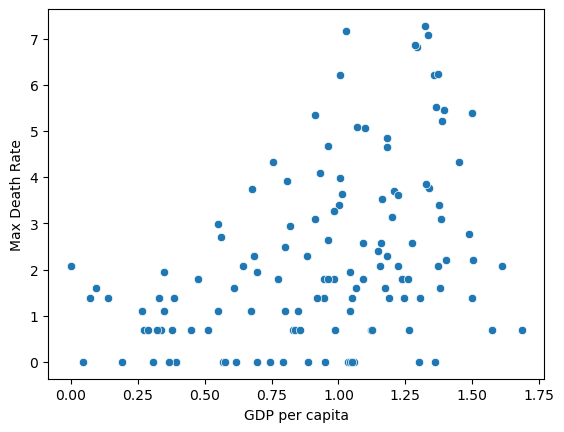

In [131]:
x = data["GDP per capita"]
y = data["Max Death Rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot: xlabel='GDP per capita', ylabel='Max Death Rate'>

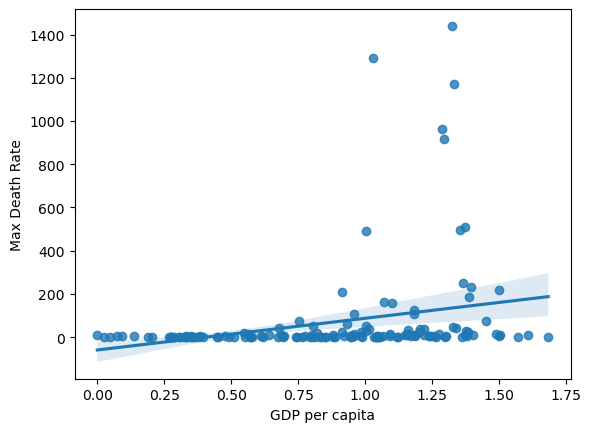

In [132]:
sns.regplot(x=x,y=y)

### Task 5.2: Plotting Social support vs Max Death Rate

<AxesSubplot: xlabel='Social support', ylabel='Max Death Rate'>

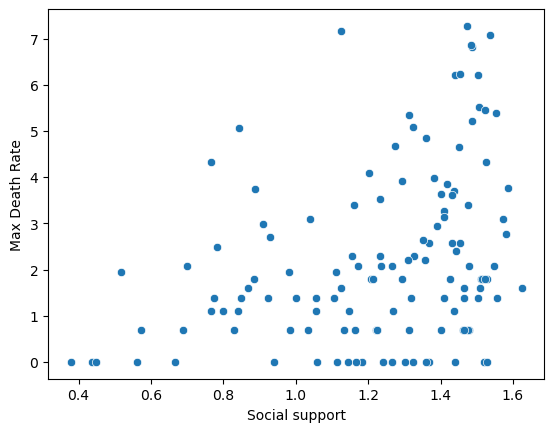

In [133]:
x = data["Social support"]
y = data["Max Death Rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot: xlabel='Social support', ylabel='Max Death Rate'>

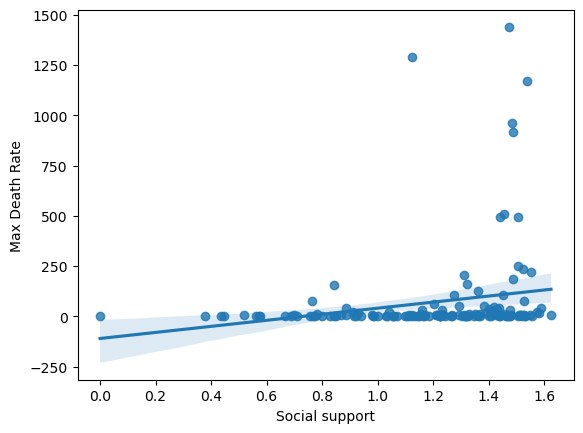

In [134]:
sns.regplot(x=x,y=y)

### Task 5.3: Plotting Healthy life expectancy vs Max Death Rate

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='Max Death Rate'>

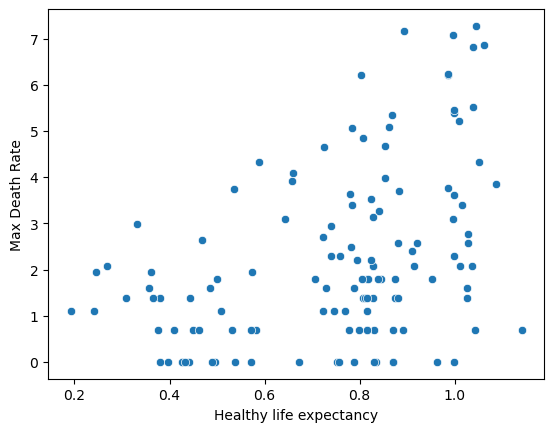

In [135]:
x = data["Healthy life expectancy"]
y = data["Max Death Rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='Max Death Rate'>

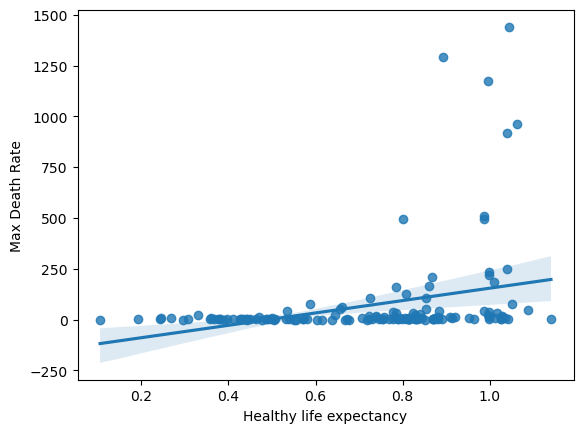

In [136]:
sns.regplot(x=x,y=y)

### In conclusion, people that live in more developed countries are more prone to dying from the disease than those that live in less developed countries.

### We found that a country's relationship between their state of development and their COVID-19 death rates is similar to their relationship between their state of development and their COVID-19 infection rates. The state of a country's development is used as a judgement of the quality of their medical care. Thus, we can further conclude that the the less developed countries are less likely to die from the disease, despite having a lower status of medical care. 